In [1]:
from utils import *
from IPython.core.pylabtools import figsize


In [2]:
chips_path = './data/chips.csv'
geyser_path = './data/geyser.csv'
# SIZE_X = 14
# SIZE_Y = 7
# figsize(SIZE_X, SIZE_Y)

In [3]:
def process_dataset(X, Y):
    Cs = [0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]
    poly_degrees = [2, 3, 4, 5]
    betas = [1, 2, 3, 4, 5]

    linear_results = test_kernel(X, Y, Cs, LinearKernel)
    polynomial_results = test_kernel(X, Y, Cs, PolynomialKernel, poly_degrees)
    gaussian_results = test_kernel(X, Y, Cs, GaussianKernel, betas)

    linear_results.sort(reverse=True)
    polynomial_results.sort(reverse=True)
    gaussian_results.sort(reverse=True)
    best_linear = linear_results[0]
    best_polynomial = polynomial_results[0]
    best_gaussian = gaussian_results[0]

    print('best linear: ', best_linear)
    print('best polynomial: ', best_polynomial)
    print('best gaussian: ', best_gaussian)

    best_lin = [LinearKernel, best_linear[1], best_linear[2], best_linear[0]]
    best_pol = [PolynomialKernel, best_polynomial[1], best_polynomial[2], best_polynomial[0]]
    best_gauss = [GaussianKernel, best_gaussian[1], best_gaussian[2], best_gaussian[0]]
    return best_lin, best_pol, best_gauss, [linear_results, polynomial_results, gaussian_results]


In [4]:
def draw_best(X, Y, besties):
    for val in besties:
        kernel = val[0](val[2])
        print("{}:  C = {}, {}with accuracy: {}".format(
            str(kernel),
            str(val[1]),
            kernel.param_name() + " = " + str(val[2]) + ", " if kernel.param_name() is not None else "",
            str(val[3])
        ))
        draw_plot(X, Y, kernel, val[1])

In [5]:
X_chips, Y_chips = read_data(chips_path)
lin_chips, pol_chips, gauss_chips, all_res_chips = process_dataset(X_chips, Y_chips)

best linear:  [0.5094017094017094, 0.1, 0]
best polynomial:  [0.6529914529914529, 10.0, 5]
best gaussian:  [0.8132478632478634, 0.5, 5]


Linear kernel:  C = 0.1, degree = 0, with accuracy: 0.5094017094017094


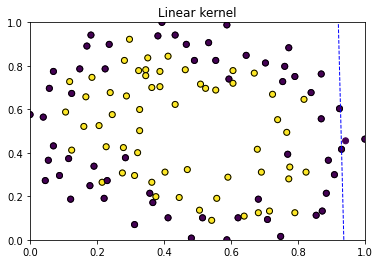

Polynomial kernel:  C = 10.0, degree = 5, with accuracy: 0.6529914529914529


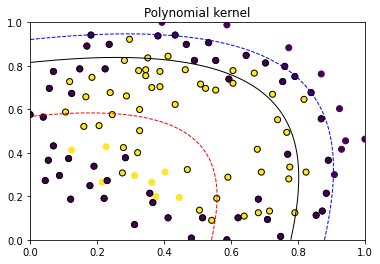

Gaussian kernel:  C = 0.5, gamma = 5, with accuracy: 0.8132478632478634


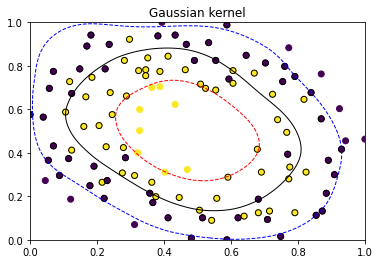

In [6]:
draw_best_fast(X_chips, Y_chips, [lin_chips, pol_chips, gauss_chips])

In [7]:
X_geyser, Y_geyser = read_data(geyser_path)
lin_geyser, pol_geyser, gauss_geyser, all_res_geyser = process_dataset(X_geyser, Y_geyser)

best linear:  [0.9054054054054054, 10.0, 0]
best polynomial:  [0.9009009009009009, 5.0, 2]
best gaussian:  [0.9054054054054054, 1.0, 1]


Linear kernel:  C = 10.0, degree = 0, with accuracy: 0.9054054054054054


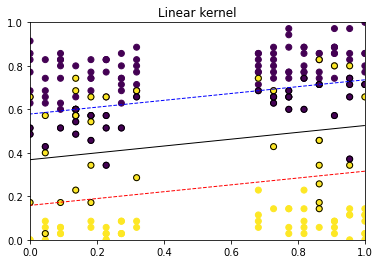

Polynomial kernel:  C = 5.0, degree = 2, with accuracy: 0.9009009009009009


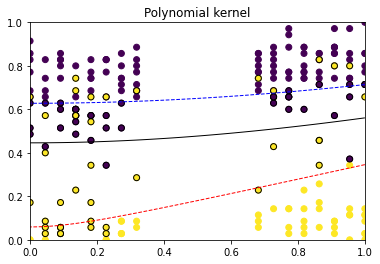

Gaussian kernel:  C = 1.0, gamma = 1, with accuracy: 0.9054054054054054


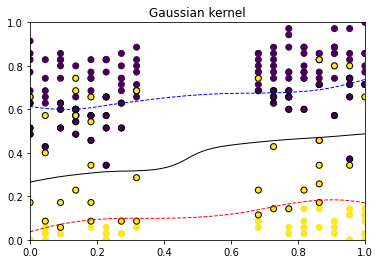

In [8]:
draw_best_fast(X_geyser, Y_geyser, [lin_geyser, pol_geyser, gauss_geyser])

Linear kernel:  C = 0.1, degree = 0, with accuracy: 0.5094017094017094


100%|██████████| 124416/124416 [00:31<00:00, 3924.11it/s]
C:\Program Files\Python39\lib\site-packages\mlxtend\plotting\decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


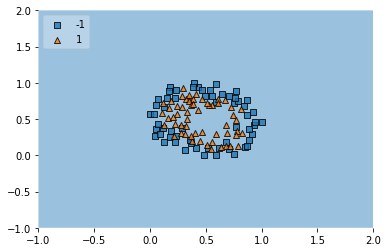

Polynomial kernel:  C = 10.0, degree = 5, with accuracy: 0.6529914529914529


100%|██████████| 124416/124416 [00:32<00:00, 3805.05it/s]


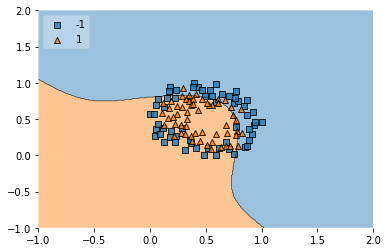

Gaussian kernel:  C = 0.5, gamma = 5, with accuracy: 0.8132478632478634


100%|██████████| 124416/124416 [01:49<00:00, 1135.08it/s]


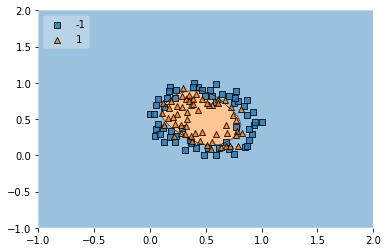

In [9]:
draw_best(X_chips, Y_chips, [lin_chips, pol_chips, gauss_chips])

Linear kernel:  C = 10.0, degree = 0, with accuracy: 0.9054054054054054


100%|██████████| 124416/124416 [00:55<00:00, 2228.21it/s]


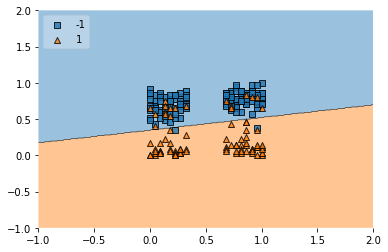

Polynomial kernel:  C = 5.0, degree = 2, with accuracy: 0.9009009009009009


100%|██████████| 124416/124416 [00:58<00:00, 2144.01it/s]


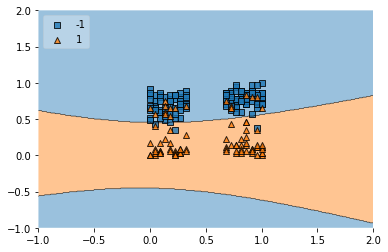

Gaussian kernel:  C = 1.0, gamma = 1, with accuracy: 0.9054054054054054


100%|██████████| 124416/124416 [03:25<00:00, 606.41it/s]


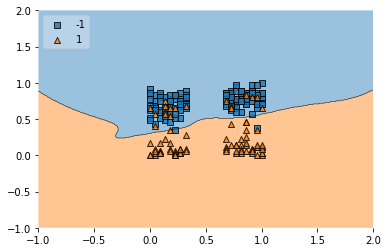

In [10]:
draw_best(X_geyser, Y_geyser, [lin_geyser, pol_geyser, gauss_geyser])

In [11]:
def print_supp(res, count, name):
    print(name)
    for i in range(count):
        print("\t\tacc: {}, C: {}, param: {}".format(
            res[i][0],
            res[i][1],
            res[i][2],
        ))

def print_all(res, count):
    print("Res:")
    print_supp(res[0], count, "\tLinear:")
    print_supp(res[1], count, "\tPolynomial:")
    print_supp(res[2], count, "\tGaussian:")


In [12]:
print_all(all_res_chips, 5)

Res:
	Linear:
		acc: 0.5094017094017094, C: 0.1, param: 0
		acc: 0.49166666666666664, C: 100.0, param: 0
		acc: 0.48205128205128206, C: 10.0, param: 0
		acc: 0.466025641025641, C: 5.0, param: 0
		acc: 0.466025641025641, C: 0.05, param: 0
	Polynomial:
		acc: 0.6529914529914529, C: 10.0, param: 5
		acc: 0.6525641025641026, C: 10.0, param: 4
		acc: 0.6444444444444445, C: 100.0, param: 5
		acc: 0.6440170940170941, C: 100.0, param: 4
		acc: 0.644017094017094, C: 1.0, param: 5
	Gaussian:
		acc: 0.8132478632478634, C: 0.5, param: 5
		acc: 0.8044871794871794, C: 5.0, param: 4
		acc: 0.7967948717948717, C: 10.0, param: 5
		acc: 0.7803418803418803, C: 5.0, param: 3
		acc: 0.7711538461538462, C: 1.0, param: 4


In [13]:
print_all(all_res_geyser, 5)

Res:
	Linear:
		acc: 0.9054054054054054, C: 10.0, param: 0
		acc: 0.9009009009009009, C: 100.0, param: 0
		acc: 0.8963963963963965, C: 50.0, param: 0
		acc: 0.891891891891892, C: 5.0, param: 0
		acc: 0.8873873873873874, C: 1.0, param: 0
	Polynomial:
		acc: 0.9009009009009009, C: 5.0, param: 2
		acc: 0.8963963963963963, C: 50.0, param: 2
		acc: 0.8963963963963963, C: 10.0, param: 2
		acc: 0.8918918918918918, C: 1.0, param: 2
		acc: 0.8828828828828829, C: 0.1, param: 2
	Gaussian:
		acc: 0.9054054054054054, C: 1.0, param: 1
		acc: 0.9009009009009009, C: 5.0, param: 2
		acc: 0.9009009009009009, C: 5.0, param: 1
		acc: 0.9009009009009009, C: 1.0, param: 3
		acc: 0.8963963963963965, C: 1.0, param: 5
